 # Stream: Averaging and Outliers

 This example shows how to clean up a stream of data by removing outliers and
 and averaging the values over time. 

 ## Working path

 Set the working path where the data is stored. For now we'll use the
 provided example data in this current directory.

 But the path could be any where on your computer. For example, if you have a
 folder called "data" in your home directory, you could set the path to:
 `path = "U:\\data\\processing\\Campgain2023_of_aswsome\\data"`

In [2]:
# all the imports, but we'll go through them one by one as we use them
import os
import matplotlib.pyplot as plt
from particula.data import loader_interface, settings_generator, stream_stats
from particula.data.tests.example_data.get_example_data import get_data_folder
from particula.data.loader_setting_builders import (
    # These functions create settings for loading data from files.
    DataChecksBuilder,
    Loader1DSettingsBuilder,
)

# set the parent directory of the data folder
path = get_data_folder()
print('Path to data folder:')
print(path.rsplit('particula')[-1])

Path to data folder:
\data\tests\example_data


# Load the data

For this example we'll use the provided example data. But you can change the
path to any folder on your computer. We then can used the settings generator to
load the data.

In [3]:
# settings for the CPC data
data_checks_cpc = (
    DataChecksBuilder()
    .set_characters([10, 100])
    .set_char_counts({",": 4})
    .build()
)

settings = (
    Loader1DSettingsBuilder()
    .set_relative_data_folder("CPC_3010_data")
    .set_filename_regex("*.csv")
    .set_header_row(0)
    .set_data_checks(data_checks_cpc)  # from above
    .set_data_column([1, 2])
    .set_data_header(["CPC_count[#/sec]", "Temperature[degC]"])
    .set_time_column([0])
    .set_time_format("epoch")
    .set_delimiter(",")
    .set_timezone_identifier("UTC")
    .build()
)

# now call the loader interface
data_stream = loader_interface.load_files_interface(
    path=path,
    settings=settings,
)

  Loading file: CPC_3010_data_20220709_Jul.csv
  Loading file: CPC_3010_data_20220710_Jul.csv


In [4]:
# print data stream summary
print('Stream:')
print(data_stream)

Stream:
Stream(header=['CPC_count[#/sec]', 'Temperature[degC]'], data=array([[3.3510e+04, 1.7000e+01],
       [3.3465e+04, 1.7100e+01],
       [3.2171e+04, 1.7000e+01],
       ...,
       [1.9403e+04, 1.6900e+01],
       [2.0230e+04, 1.7000e+01],
       [1.9521e+04, 1.6800e+01]]), time=array([1.65734280e+09, 1.65734281e+09, 1.65734281e+09, ...,
       1.65751559e+09, 1.65751560e+09, 1.65751560e+09]), files=[['CPC_3010_data_20220709_Jul.csv', 1044534], ['CPC_3010_data_20220710_Jul.csv', 1113488]])


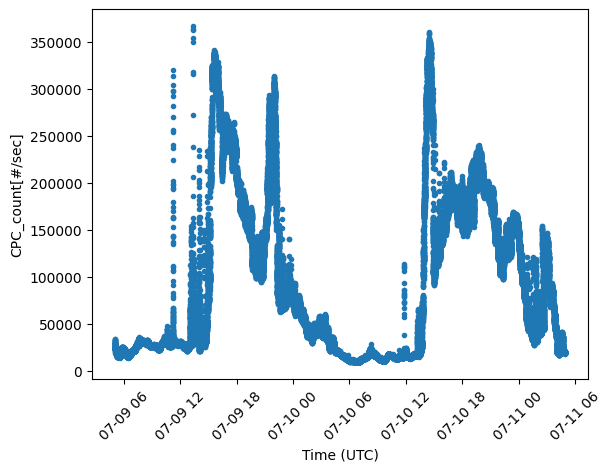

In [5]:
# plot the data
fig, ax = plt.subplots()
ax.plot(data_stream.datetime64,
        data_stream.data[:, 0],  # data_stream.data is a 2d array, so we need
                                 # to specify which column we want to plot
        label=data_stream.header[0],
        linestyle="none",
        marker=".",)
plt.xticks(rotation=45)
ax.set_xlabel("Time (UTC)")
ax.set_ylabel(data_stream.header[0])
plt.show()
fig.tight_layout()

# Average the data

Now that we have the data loaded, we can average the data over time. We'll use
the 'particula.data.stream_stats' module to do this. The module has a function
called 'averaged_std' that will take stream object and return a new stream
object with the averaged data and the standard deviation of the data.

In [6]:
stream_averaged = stream_stats.average_std(
    stream=data_stream,
    average_interval=600,
)
stream_averaged.standard_deviation.shape

(288, 2)

# Plot the averaged data

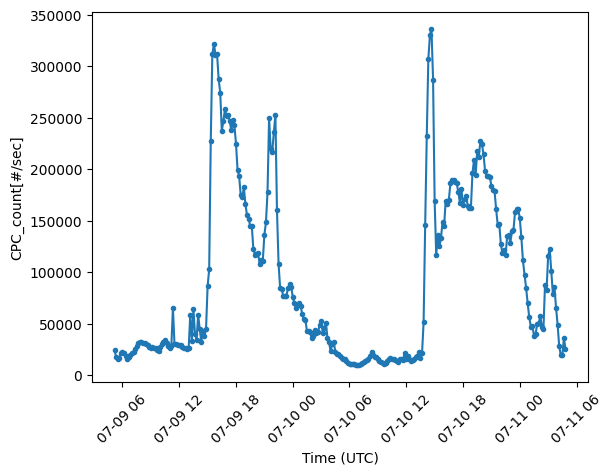

In [7]:
fig, ax = plt.subplots()
ax.plot(stream_averaged.datetime64,
        stream_averaged.data[:, 0],
        label=stream_averaged.header[0],
        marker=".",)
plt.xticks(rotation=45)
ax.set_xlabel("Time (UTC)")
ax.set_ylabel(stream_averaged.header[0])
plt.show()
fig.tight_layout()

## Clean up the data

Now we may see some outliers in the data. We can use the 'particula.data.stream_stats'
module to remove the outliers. The module has a function called 'filtering'
that will take stream object and return a new stream object with the outliers
removed.

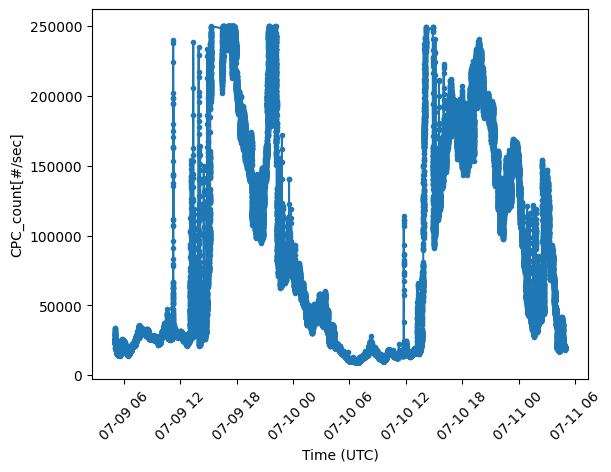

In [8]:
stream_filtered = stream_stats.filtering(
    stream=data_stream,
    top=250000,
    drop=True,
)
fig, ax = plt.subplots()
ax.plot(stream_filtered.datetime64,
        stream_filtered.data[:, 0],
        label=stream_filtered.header[0],
        marker=".",)
plt.xticks(rotation=45)
ax.set_xlabel("Time (UTC)")
ax.set_ylabel(stream_filtered.header[0])
plt.show()
fig.tight_layout()


## Summary

This example shows how to clean up a stream of data by removing outliers and
and averaging the values over time.
